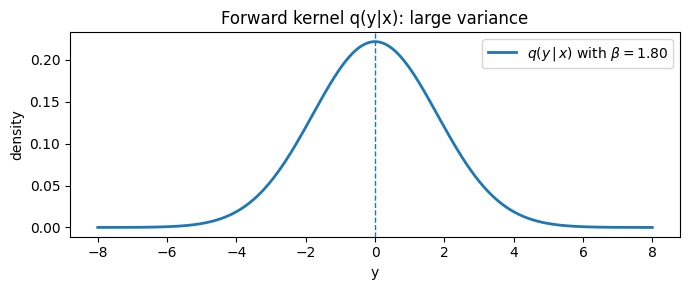

In [ ]:
# This script illustrates the intuition with the toy model: y = x + beta * epsilon, epsilon ~ N(0,1).
# We visualize:
# 1) Forward kernel q(y|x) for a fixed x (large beta vs small beta).
# 2) Reverse posterior q(x|y) ∝ q(y|x) q(x) under a multimodal prior q(x) (large beta vs small beta).
#
# We avoid specifying colors per instructions; default matplotlib styles will be used.

import numpy as np
import matplotlib.pyplot as plt


# ---------- Helpers ----------
def normal_pdf(x, mean, var):
    return 1.0 / np.sqrt(2 * np.pi * var) * np.exp(-0.5 * ((x - mean) ** 2) / var)


def mixture_pdf(x, means, vars, weights):
    comps = [w * normal_pdf(x, m, v) for m, v, w in zip(means, vars, weights)]
    return np.sum(comps, axis=0)


def posterior_pdf_x_given_y(x_grid, y, beta2, prior_means, prior_vars, prior_weights):
    # Likelihood q(y|x) = N(y; x, beta^2) (as a function of x given y)
    like = normal_pdf(y, x_grid, beta2)  # same as N(x; y, beta^2) up to symmetry
    prior = mixture_pdf(x_grid, prior_means, prior_vars, prior_weights)
    unnorm = like * prior
    Z = np.trapezoid(unnorm, x_grid)
    return unnorm / (Z + 1e-12), prior


# ---------- Setup ----------
x_grid = np.linspace(-8, 8, 2000)

# Multimodal prior q(x): a 3-component Gaussian mixture
prior_means = np.array([-4.0, 0.0, 3.0])
prior_vars = np.array([1.0, 0.4, 0.7])  # variances
prior_weights = np.array([0.4, 0.3, 0.3])
prior_weights = prior_weights / prior_weights.sum()

# Fix a specific observation y
y_obs = 0.5

# Two regimes
beta_large = 1.8  # large noise (wide forward kernel, multimodal posterior)
beta_small = 0.25  # small noise (narrow forward kernel, near-Gaussian posterior)
beta2_large = beta_large**2
beta2_small = beta_small**2

# Pick a reference x for plotting the forward kernel q(y|x) as a function of y
x_ref = 0.0
y_grid = x_grid.copy()  # same range is fine

# ---------- Compute densities ----------
# Forward kernels (as densities over y for fixed x_ref)
forward_large = normal_pdf(y_grid, x_ref, beta2_large)
forward_small = normal_pdf(y_grid, x_ref, beta2_small)

# Reverse posteriors q(x|y) (as densities over x for fixed y_obs), and prior q(x)
post_large, prior_pdf = posterior_pdf_x_given_y(
    x_grid, y_obs, beta2_large, prior_means, prior_vars, prior_weights
)
post_small, _ = posterior_pdf_x_given_y(x_grid, y_obs, beta2_small, prior_means, prior_vars, prior_weights)

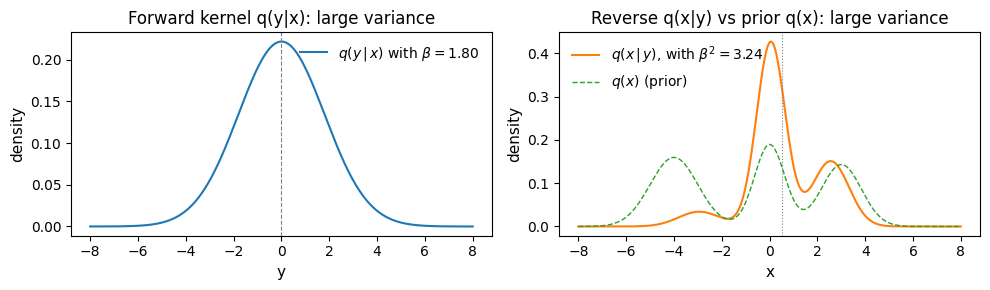

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# --- Plot 1: Forward (large beta) ---
axes[0].plot(
    y_grid,
    forward_large,
    color="tab:blue",
    linewidth=1.5,
    label=rf"$q(y\,|\,x)$ with $\beta={beta_large:.2f}$",
)
axes[0].axvline(x=x_ref, color="gray", linestyle="--", linewidth=0.8)
axes[0].set_title("Forward kernel q(y|x): large variance", fontsize=12)
axes[0].set_xlabel("y", fontsize=11)
axes[0].set_ylabel("density", fontsize=11)
axes[0].legend(frameon=False, fontsize=10)

# --- Plot 2: Reverse (large beta) ---
axes[1].plot(
    x_grid,
    post_large,
    color="tab:orange",
    linewidth=1.5,
    label=rf"$q(x\,|\,y)$, with $\beta^2={beta2_large:.2f}$",
)
axes[1].plot(x_grid, prior_pdf, color="tab:green", linewidth=1.0, linestyle="--", label=r"$q(x)$ (prior)")
axes[1].axvline(x=y_obs, color="gray", linestyle=":", linewidth=0.8)
axes[1].set_title("Reverse q(x|y) vs prior q(x): large variance", fontsize=12)
axes[1].set_xlabel("x", fontsize=11)
axes[1].set_ylabel("density", fontsize=11)
axes[1].legend(frameon=False, fontsize=10)

plt.tight_layout()
plt.show()


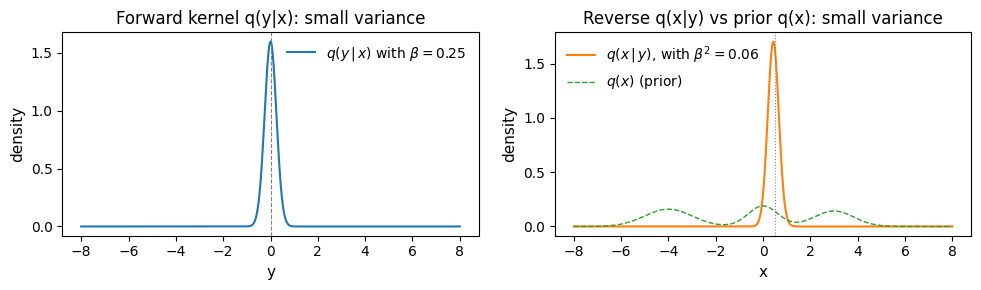

In [27]:
# ---------- Side-by-side plots: Forward & Reverse (small beta) ----------
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# --- Plot 3: Forward (small beta) ---
axes[0].plot(
    y_grid,
    forward_small,
    color="tab:blue",
    linewidth=1.5,
    label=rf"$q(y\,|\,x)$ with $\beta={beta_small:.2f}$",
)
axes[0].axvline(x=x_ref, color="gray", linestyle="--", linewidth=0.8)
axes[0].set_title("Forward kernel q(y|x): small variance", fontsize=12)
axes[0].set_xlabel("y", fontsize=11)
axes[0].set_ylabel("density", fontsize=11)
axes[0].legend(frameon=False, fontsize=10)

# --- Plot 4: Reverse (small beta) ---
axes[1].plot(
    x_grid,
    post_small,
    color="tab:orange",
    linewidth=1.5,
    label=rf"$q(x\,|\,y)$, with $\beta^2={beta2_small:.2f}$",
)
axes[1].plot(x_grid, prior_pdf, color="tab:green", linewidth=1.0, linestyle="--", label=r"$q(x)$ (prior)")
axes[1].axvline(x=y_obs, color="gray", linestyle=":", linewidth=0.8)
axes[1].set_title("Reverse q(x|y) vs prior q(x): small variance", fontsize=12)
axes[1].set_xlabel("x", fontsize=11)
axes[1].set_ylabel("density", fontsize=11)
axes[1].legend(frameon=False, fontsize=10)

plt.tight_layout()
plt.show()
